## Step 1: Import all required packages and libraries

In [1004]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Step 2: Reading and Understanding the Data

In [1005]:
#load data from the file into a datafrae=me
lead_df = pd.read_csv('Leads.csv')

# examing first few rows
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1006]:
lead_df.shape

(9240, 37)

In [1007]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1008]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1009]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 3: Data Cleaning

In [1010]:
#Distinct values in each columns to identify numeric vs categorical columns
lead_df.nunique().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine            

In [1011]:
#Check for duplicates
lead_df_new = lead_df.copy()
lead_df_new.shape

(9240, 37)

In [1012]:
lead_df_new.drop_duplicates(inplace=True)
lead_df_new.shape

(9240, 37)

In [1013]:
lead_df.shape

(9240, 37)

In [1014]:
##No duplicates found since there is no change in shape between 2 dataframes

In [1015]:
#Check no of nulls in each column
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [1016]:
# Finding the null percentages across columns
round(lead_df.isnull().sum()/lead_df.shape[0],2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [1017]:
nullvalues = lead_df.isnull().sum().sort_values(ascending = False)
len(nullvalues)

#There are 17 columns which has null values

37

In [1018]:

nullvalues = nullvalues[nullvalues.values > (0.30 * lead_df.shape[0])]
len(nullvalues)
#There are 6 columns which has more than 30 percetage values as null. 
#These columns should be dropped from the dataframe

6

In [1019]:
nullvalues

Lead Quality                   4767
Asymmetrique Activity Index    4218
Asymmetrique Profile Score     4218
Asymmetrique Activity Score    4218
Asymmetrique Profile Index     4218
Tags                           3353
dtype: int64

In [1020]:
nullvalues.index

Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Index', 'Tags'],
      dtype='object')

In [1021]:
#Drop these 6 columns which has > 30% of null values
lead_df.drop(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Index', 'Tags'], 1, inplace = True)

In [1022]:
nullvalues = lead_df.isnull().sum().sort_values(ascending = False)
nullvalues = nullvalues[nullvalues.values > (0.30 * lead_df.shape[0])]
len(nullvalues)

0

In [1023]:
# Finding the null percentages across columns
round(lead_df.isnull().sum()/lead_df.shape[0],2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [1024]:
nullvalues = lead_df.isnull().sum().sort_values(ascending = False)
focuscolumns = nullvalues[nullvalues.values > 0]
len(focuscolumns)
#There are 11 columns which still has null values. These columns need to be assessed in detail.

11

In [1025]:
focuscolumns

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
dtype: int64

Column Name:  What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


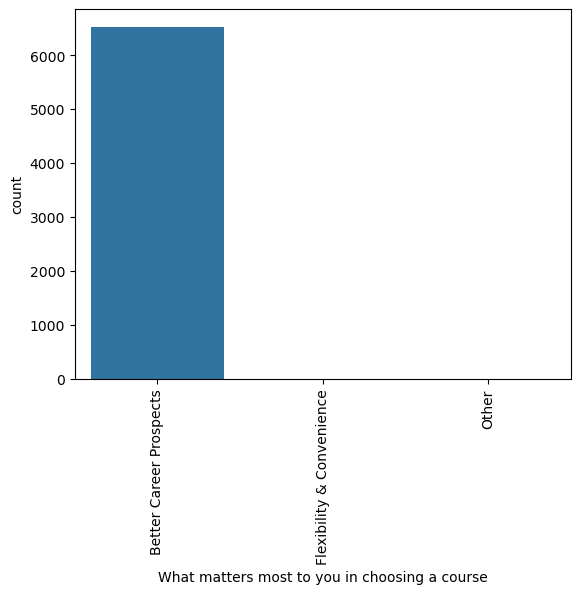

***********************************

Column Name:  Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64


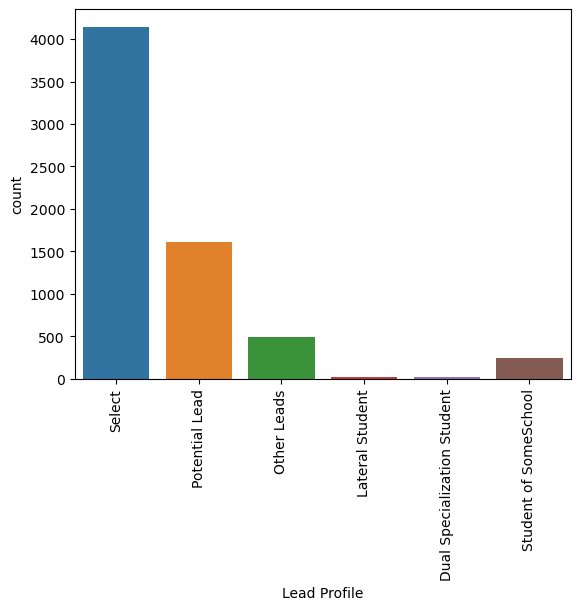

***********************************

Column Name:  What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


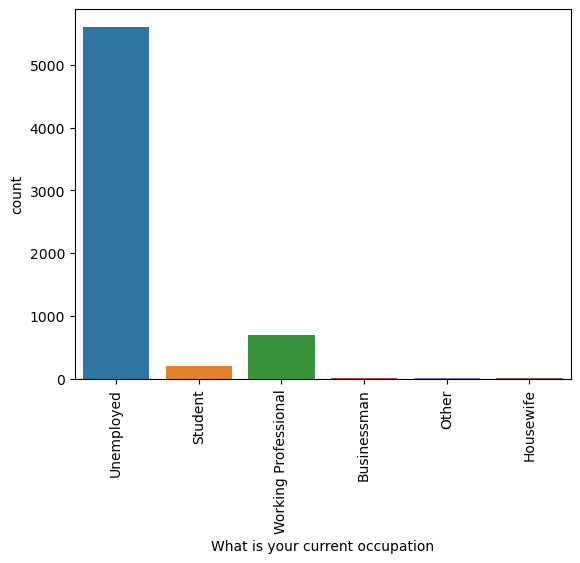

***********************************

Column Name:  Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania     

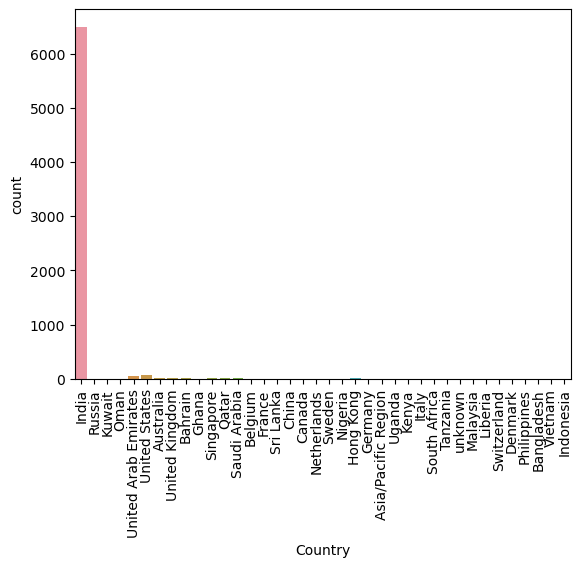

***********************************

Column Name:  How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64


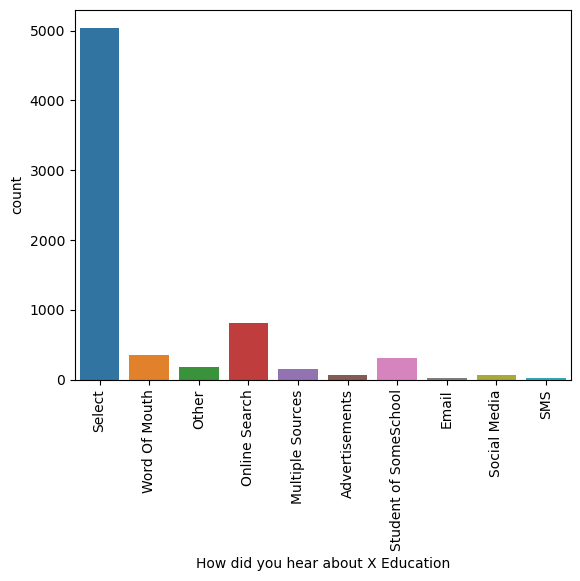

***********************************

Column Name:  Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


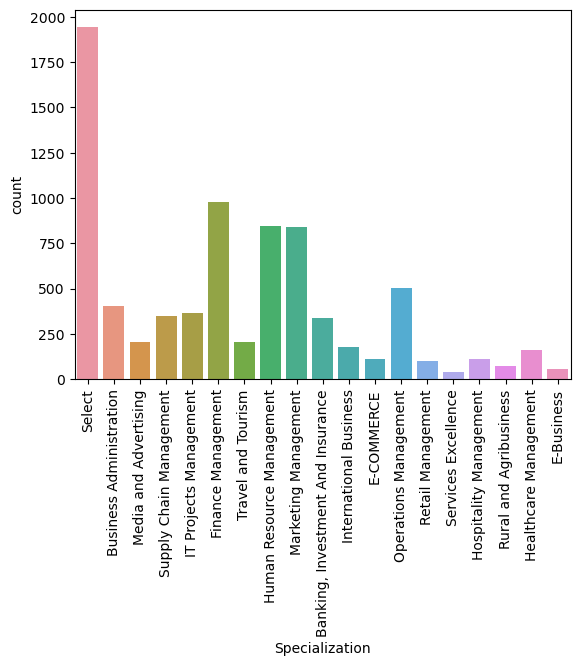

***********************************

Column Name:  City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


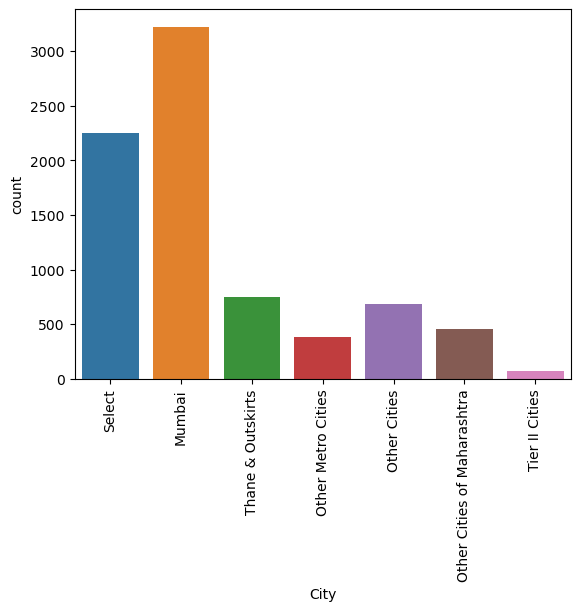

***********************************

Column Name:  Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64


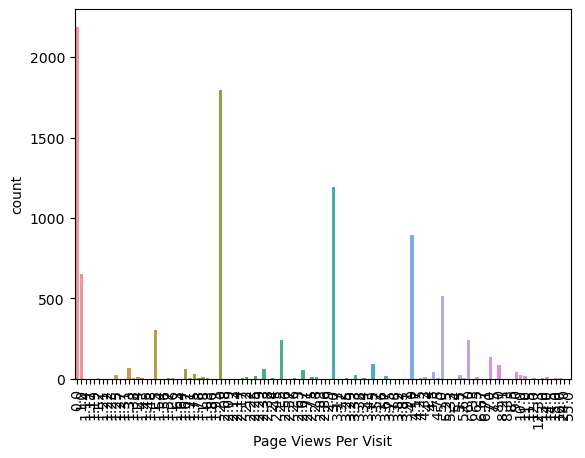

***********************************

Column Name:  TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64


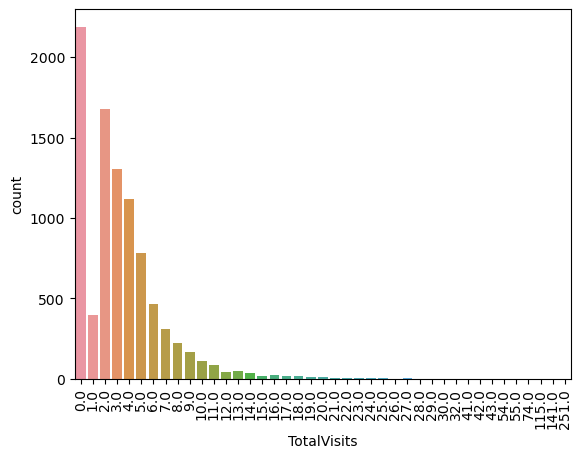

***********************************

Column Name:  Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64


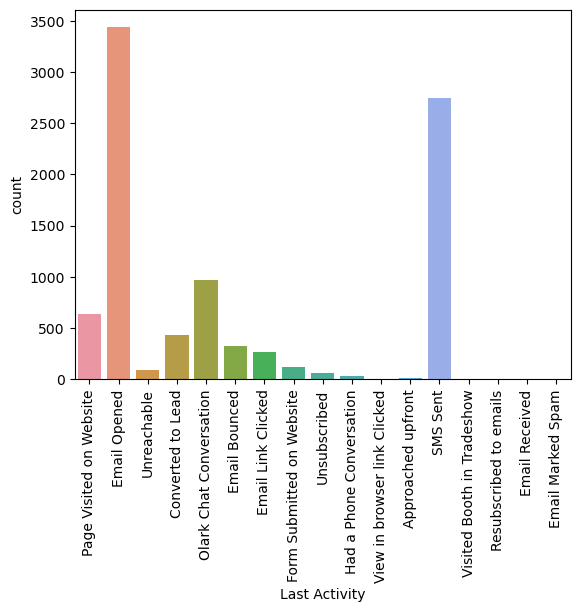

***********************************

Column Name:  Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64


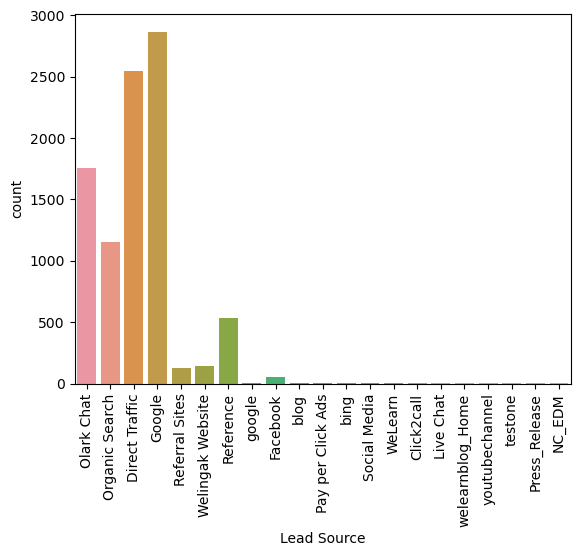

***********************************



In [1026]:
#Vaidate the value counts of each column
for i in focuscolumns.index:
    print('Column Name: ',i)
    print(lead_df[i].value_counts())
    sns.countplot(lead_df[i])
    plt.xticks(rotation = 90)
    plt.show()
    print('***********************************')
    print("")

In [1027]:
#These columns have majority of values as not selected. Hence we need to convert this to null.
cols = ['Lead Profile','How did you hear about X Education','Specialization','City']
for i in cols:
    lead_df[i] = lead_df[i].replace('Select',np.nan)

In [1028]:
for i in cols:
    print('Column Name: ',i)
    print(lead_df[i].value_counts())
    print('***********************************')
    print("")

Column Name:  Lead Profile
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64
***********************************

Column Name:  How did you hear about X Education
Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64
***********************************

Column Name:  Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banki

In [1029]:
# Finding the null percentages across columns
round(lead_df.isnull().sum()/lead_df.shape[0],2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [1030]:
nullvalues = lead_df.isnull().sum().sort_values(ascending = False)
nullvalues = nullvalues[nullvalues.values > (0.30 * lead_df.shape[0])]
len(nullvalues)

4

In [1031]:
nullvalues.index

Index(['How did you hear about X Education', 'Lead Profile', 'City',
       'Specialization'],
      dtype='object')

In [1032]:
#Drop these 4 columns which has > 30% of null values
lead_df.drop(['How did you hear about X Education', 'Lead Profile', 'City',
       'Specialization'], 1, inplace = True)

In [1033]:
# Finding the null percentages across columns
round(lead_df.isnull().sum()/lead_df.shape[0],2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                   

In [1034]:
nullvalues = lead_df.isnull().sum().sort_values(ascending = False)
focuscolumns = nullvalues[nullvalues.values > 0]
len(focuscolumns)
#There are 7 columns which still has null values. These columns need to be assessed in detail.

7

In [1035]:
focuscolumns

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
dtype: int64

Column Name:  What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


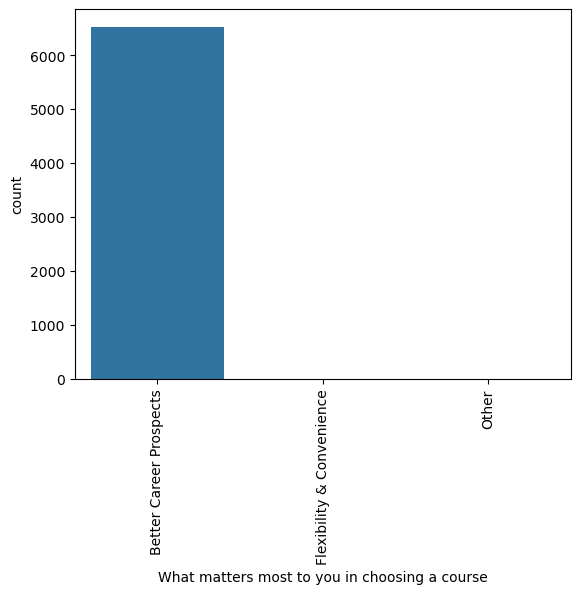

***********************************

Column Name:  What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


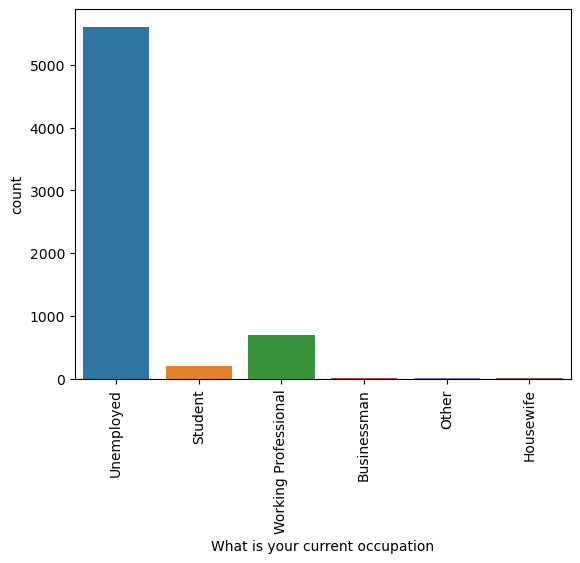

***********************************

Column Name:  Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania     

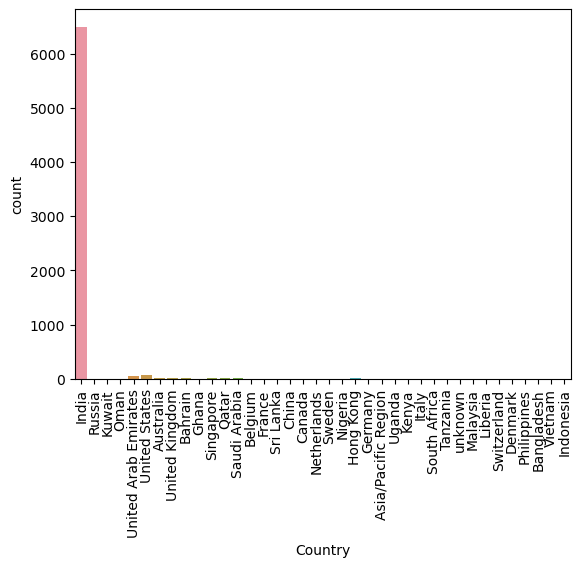

***********************************

Column Name:  TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64


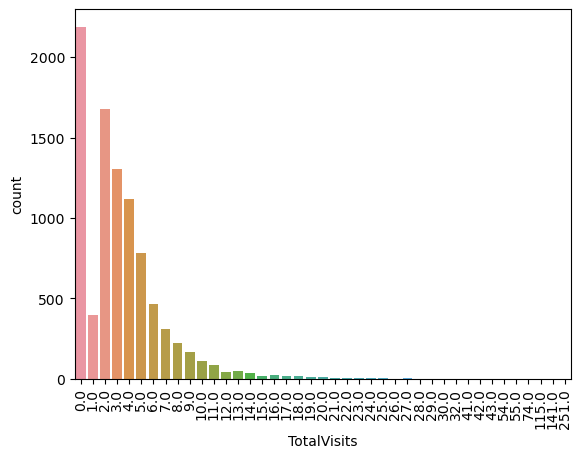

***********************************

Column Name:  Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64


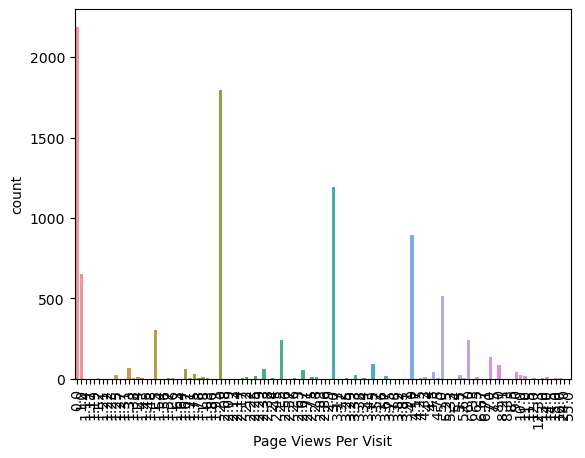

***********************************

Column Name:  Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64


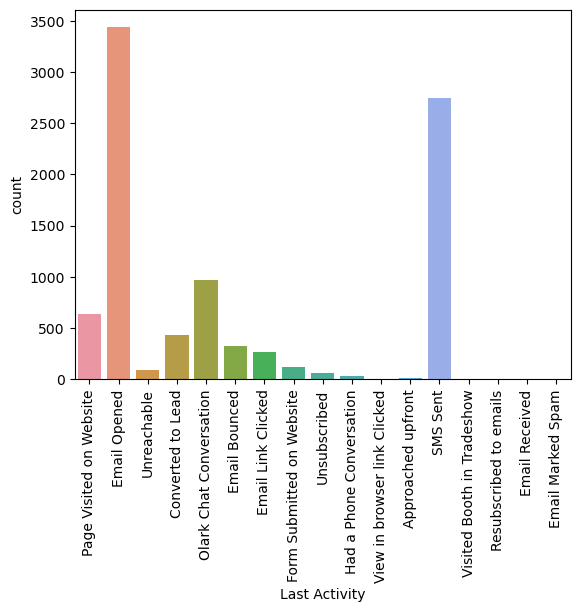

***********************************

Column Name:  Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64


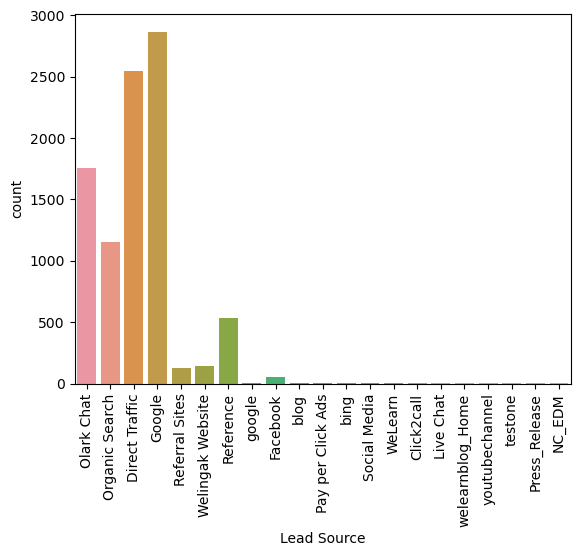

***********************************



In [1036]:
#Vaidate the value counts of each column
for i in focuscolumns.index:
    print('Column Name: ',i)
    print(lead_df[i].value_counts())
    sns.countplot(lead_df[i])
    plt.xticks(rotation = 90)
    plt.show()
    print('***********************************')
    print("")

In [1037]:
#Column 'Lead Source' can be imputed by replacing Nulls with most frequent value('Google')
lead_df['Lead Source'] = lead_df['Lead Source'].replace('google','Google')
lead_df['Lead Source'] = lead_df['Lead Source'].replace(np.nan,'Google')

In [1038]:
#Column 'TotalVisits' can be imputed by replacing Nulls with Median value
lead_df['TotalVisits'] = lead_df['TotalVisits'].replace(np.nan,lead_df['TotalVisits'].median())

In [1039]:
#Column 'Page Views Per Visit' can be imputed by replacing Nulls with Median value
lead_df['Page Views Per Visit'] = lead_df['Page Views Per Visit'].replace(np.nan,lead_df['Page Views Per Visit'].median())

In [1040]:
# Column 'Last Activity' has 1% of Null values. Hence replace those nulls with a default value 'Unavaiilable'
lead_df['Last Activity'] = lead_df['Last Activity'].replace(np.nan,'Unavailable')

In [1041]:
#Following three categorical Variables has highly biased data.

#Column 'What matters most to you in choosing a course' has highly biased data. hence drop this column.
lead_df.drop(['What matters most to you in choosing a course'],axis = 1, inplace = True)



In [1042]:
#Column 'What is your current occupation' can be imputed by replacing Nulls with most frequent value('Unemployed')
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

#Column 'Country' can be imputed by replacing Nulls with most frequent value('India')
lead_df['Country'] = lead_df['Country'].replace(np.nan,'India')

In [1043]:
# Finding the null percentages across columns
round(lead_df.isnull().sum()/lead_df.shape[0],2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [1044]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [1045]:
lead_df.shape

(9240, 26)

In [1046]:
#Columns Prospect ID and Lead Number does not have any significant values Hence drop them.
lead_df.drop(['Prospect ID','Lead Number'],axis = 1, inplace = True)

In [1047]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,No,No,No,Modified


In [1048]:
lead_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Column Name:  Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


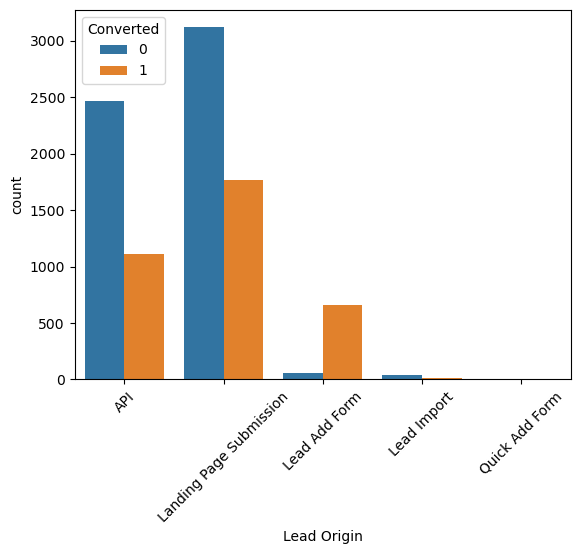

***********************************

Column Name:  Lead Source
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64


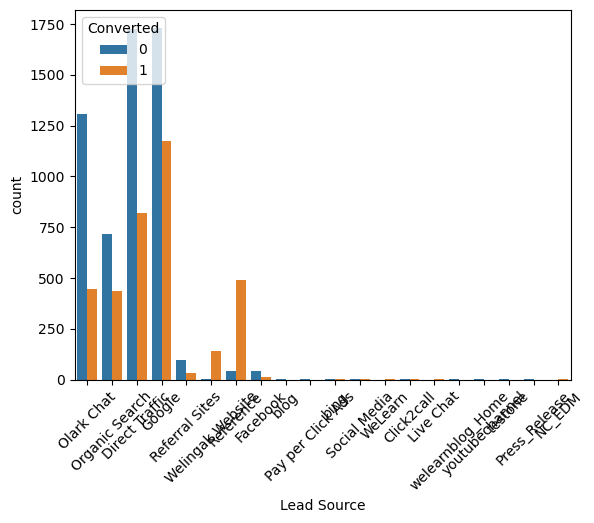

***********************************

Column Name:  Do Not Email
No     8506
Yes     734
Name: Do Not Email, dtype: int64


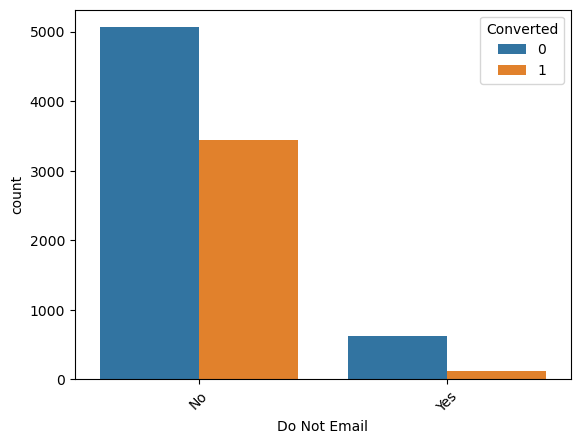

***********************************

Column Name:  Do Not Call
No     9238
Yes       2
Name: Do Not Call, dtype: int64


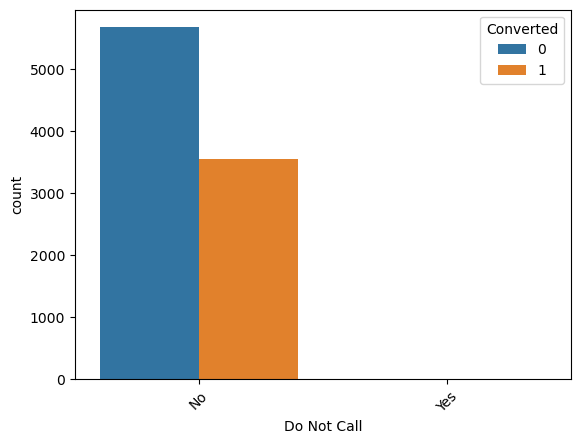

***********************************

Column Name:  Converted
0    5679
1    3561
Name: Converted, dtype: int64


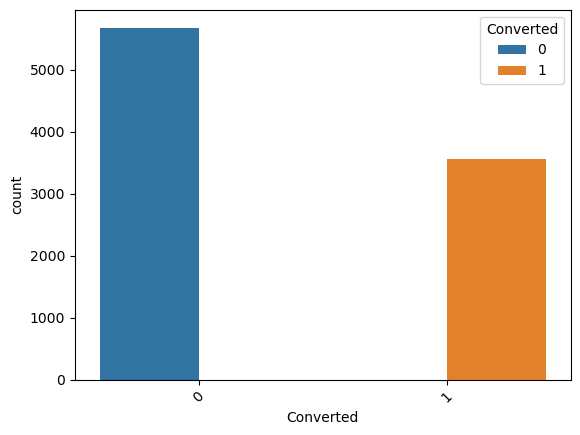

***********************************

Column Name:  TotalVisits
0.0      2189
2.0      1680
3.0      1443
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64


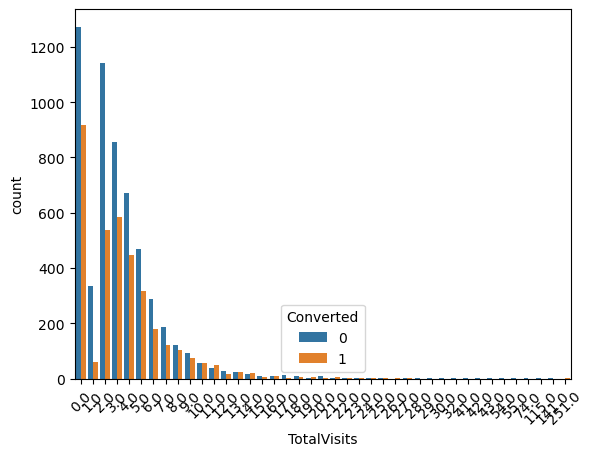

***********************************

Column Name:  Total Time Spent on Website
0       2193
60        19
74        18
75        18
127       18
        ... 
1701       1
1952       1
1229       1
1743       1
927        1
Name: Total Time Spent on Website, Length: 1731, dtype: int64


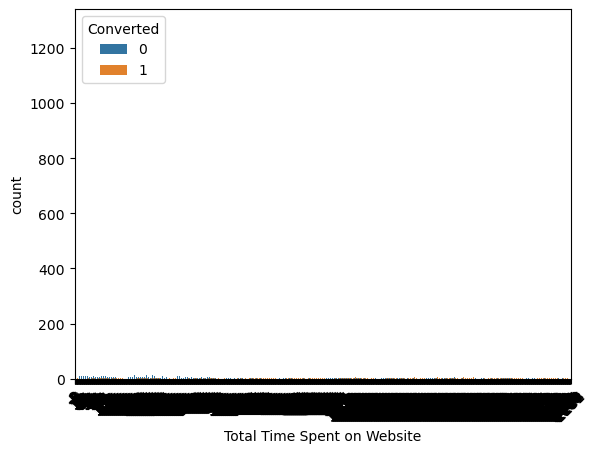

***********************************

Column Name:  Page Views Per Visit
0.00    2189
2.00    1932
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64


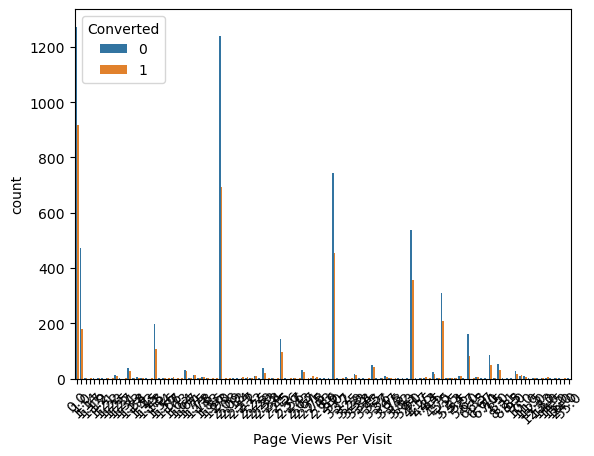

***********************************

Column Name:  Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unavailable                      103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64


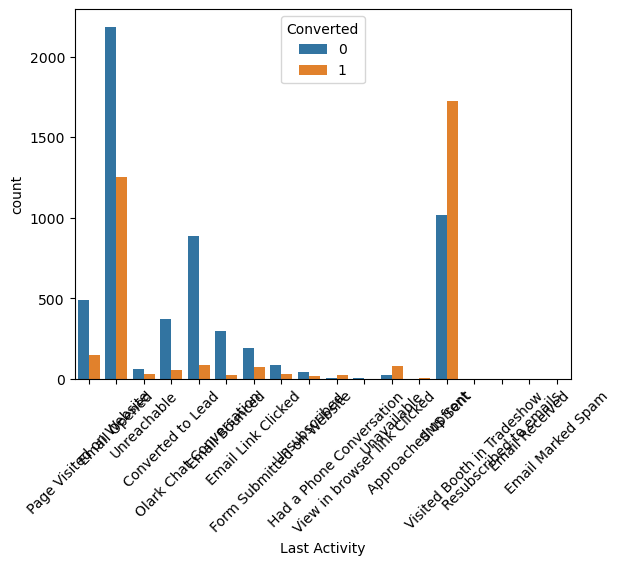

***********************************

Column Name:  Country
India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania     

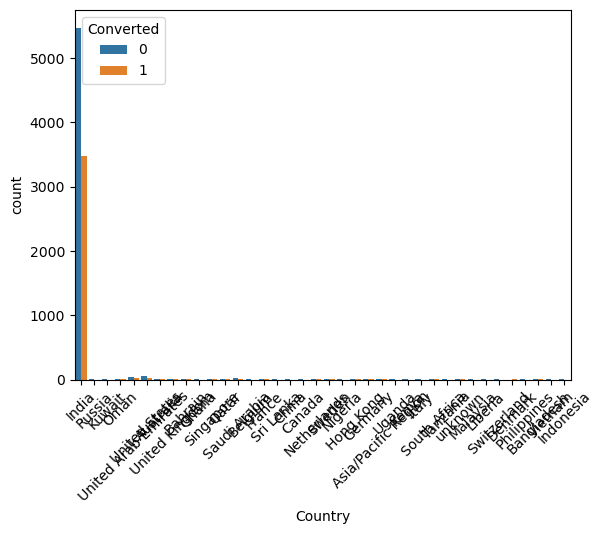

***********************************

Column Name:  What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


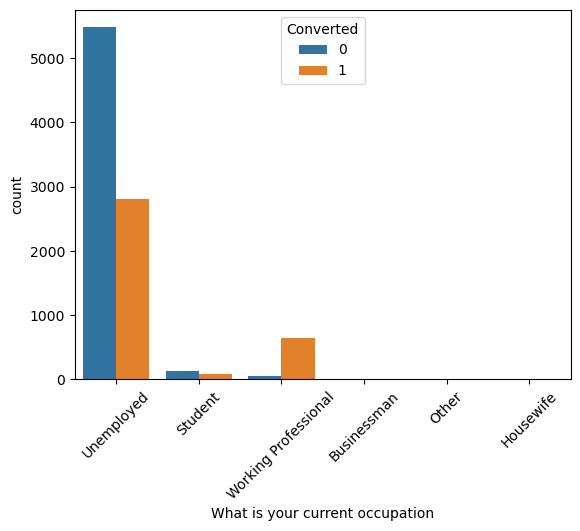

***********************************

Column Name:  Search
No     9226
Yes      14
Name: Search, dtype: int64


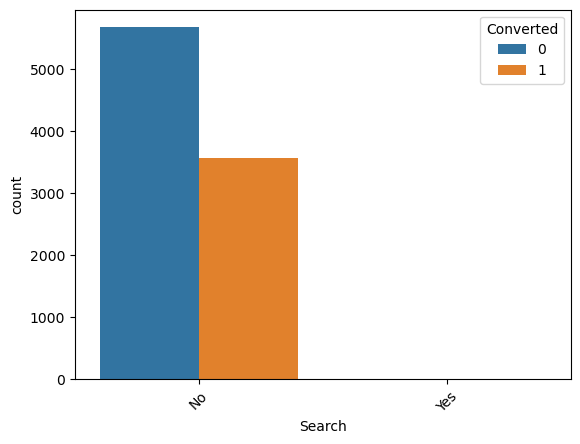

***********************************

Column Name:  Magazine
No    9240
Name: Magazine, dtype: int64


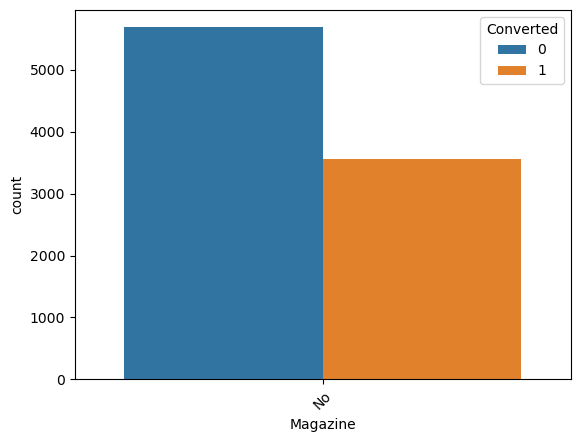

***********************************

Column Name:  Newspaper Article
No     9238
Yes       2
Name: Newspaper Article, dtype: int64


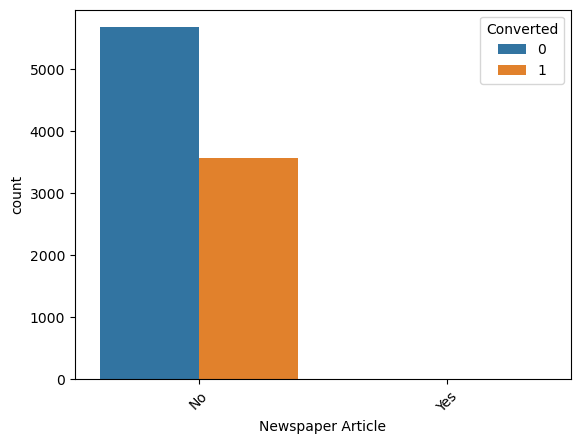

***********************************

Column Name:  X Education Forums
No     9239
Yes       1
Name: X Education Forums, dtype: int64


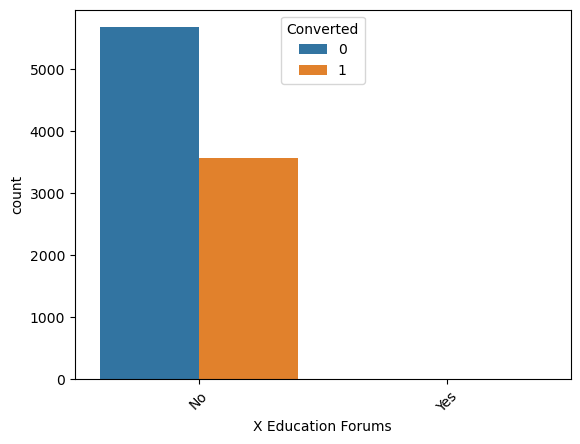

***********************************

Column Name:  Newspaper
No     9239
Yes       1
Name: Newspaper, dtype: int64


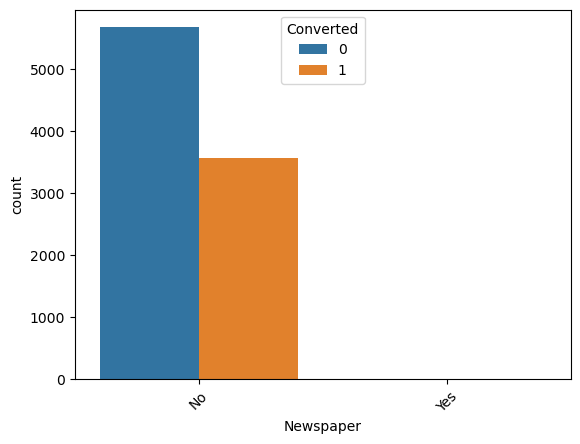

***********************************

Column Name:  Digital Advertisement
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64


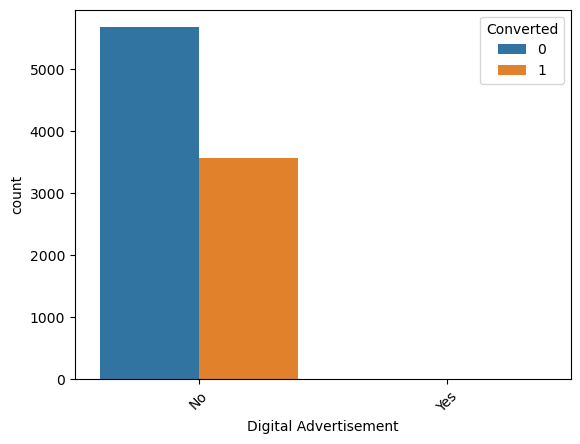

***********************************

Column Name:  Through Recommendations
No     9233
Yes       7
Name: Through Recommendations, dtype: int64


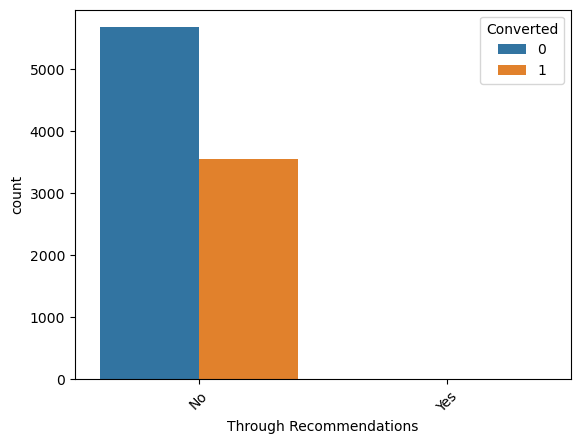

***********************************

Column Name:  Receive More Updates About Our Courses
No    9240
Name: Receive More Updates About Our Courses, dtype: int64


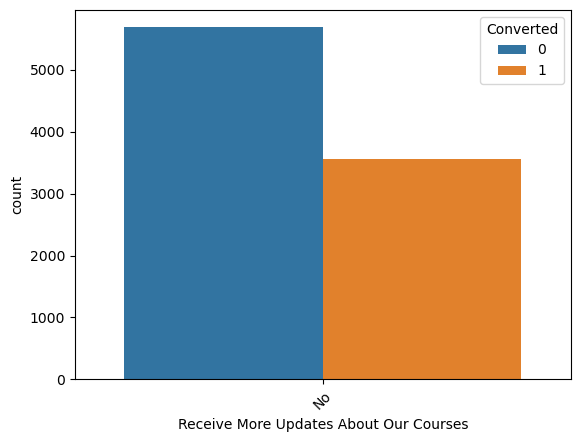

***********************************

Column Name:  Update me on Supply Chain Content
No    9240
Name: Update me on Supply Chain Content, dtype: int64


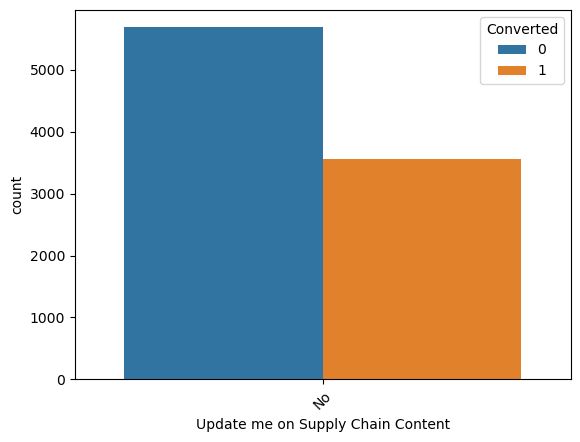

***********************************

Column Name:  Get updates on DM Content
No    9240
Name: Get updates on DM Content, dtype: int64


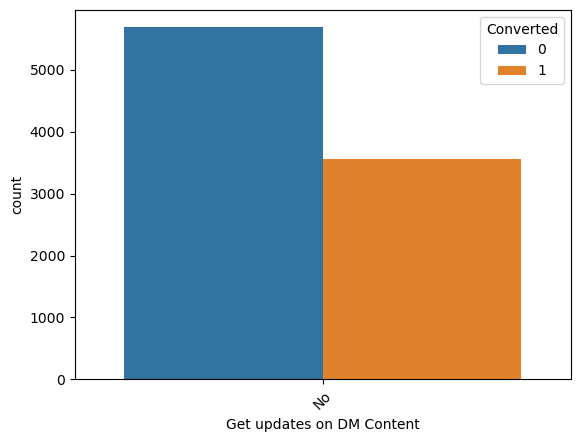

***********************************

Column Name:  I agree to pay the amount through cheque
No    9240
Name: I agree to pay the amount through cheque, dtype: int64


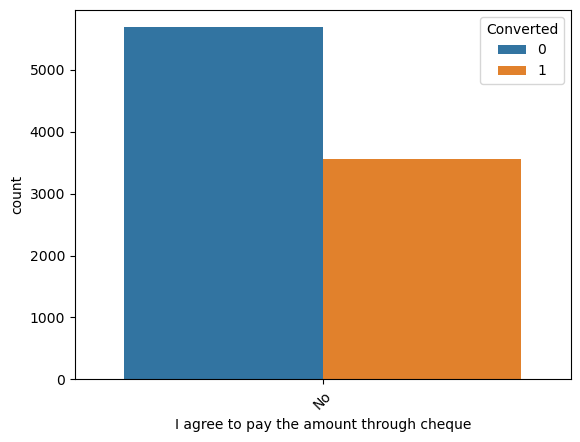

***********************************

Column Name:  A free copy of Mastering The Interview
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


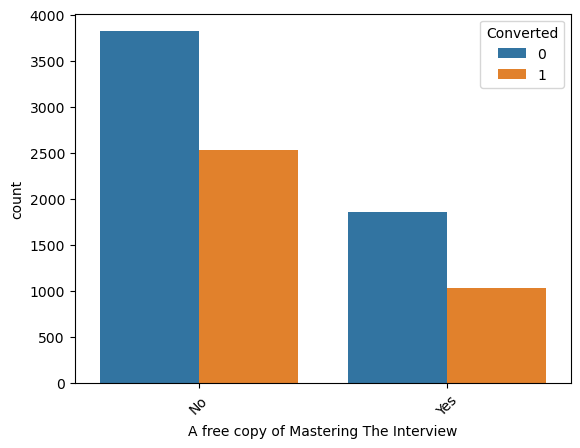

***********************************

Column Name:  Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64


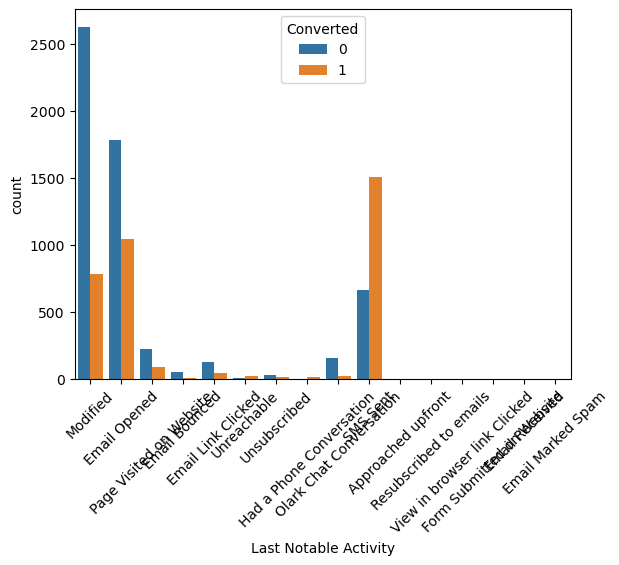

***********************************



In [1049]:
cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

#Vaidate the value counts of each column
for i in cols:
    print('Column Name: ',i)
    print(lead_df[i].value_counts())
    #sns.countplot(lead_df[i])
    sns.countplot(data = lead_df, x= i, hue ='Converted')
    plt.xticks(rotation = 45)
    plt.show()
    print('***********************************')
    print("")
    

In [1050]:
# The following columns need to be dropped since there is only one value which is used for majority of the rows. 
# They wont have much of any predictive power
colstodrop = ['Do Not Call','Country','Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque']

lead_df.drop(colstodrop,axis = 1, inplace = True)

In [1051]:
lead_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1052]:
lead_df.shape

(9240, 11)

## Step 4: Visualising the Data using EDA


In [1053]:
lead_df.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
What is your current occupation            object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

In [1054]:
# Check the columns which are of type 'object'
temp = lead_df.loc[:, lead_df.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1055]:
# Check the columns which are numerical
temp = lead_df.loc[:, lead_df.dtypes != 'object']
temp.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

In [1056]:
numericCols = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

categoricCols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']


In [1057]:
lead_df[numericCols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
max,251.000000,2272.000000,55.000000


In [1058]:
#Columns TotalVisits and Page Views Per Visit seems to have some outlier values

Mean 3.4386363636363635
Median 3.0
Mode 0.0
25% quantile:  1.0
50% quantile:  3.0
75% quantile:  5.0
90% quantile:  7.0
95% quantile:  10.0
99% quantile:  17.0
100th quantile:  0.0
 


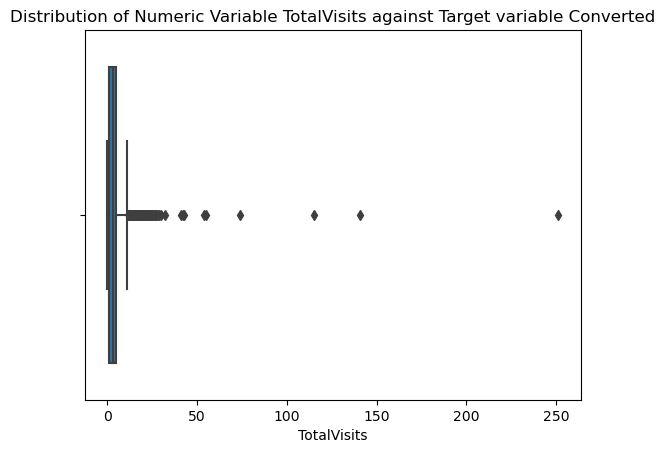

Mean 487.6982683982684
Median 248.0
Mode 0
25% quantile:  12.0
50% quantile:  248.0
75% quantile:  936.0
90% quantile:  1380.0
95% quantile:  1562.0
99% quantile:  1840.6100000000006
100th quantile:  0.0
 


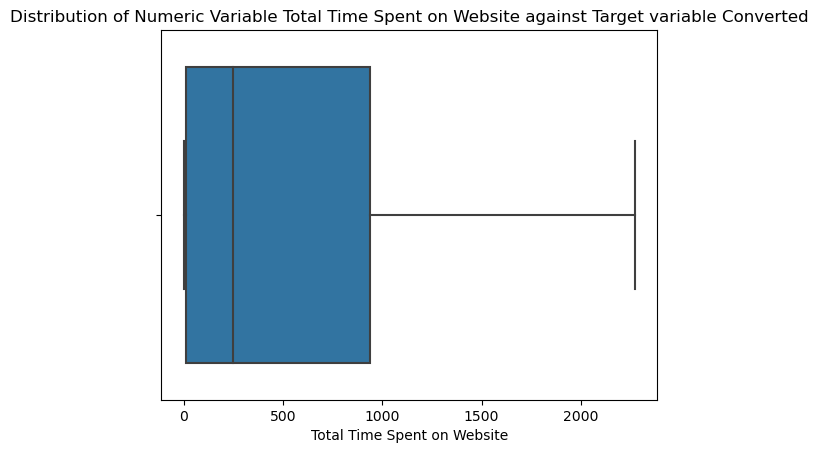

Mean 2.3574404761904764
Median 2.0
Mode 0.0
25% quantile:  1.0
50% quantile:  2.0
75% quantile:  3.0
90% quantile:  5.0
95% quantile:  6.0
99% quantile:  9.0
100th quantile:  0.0
 


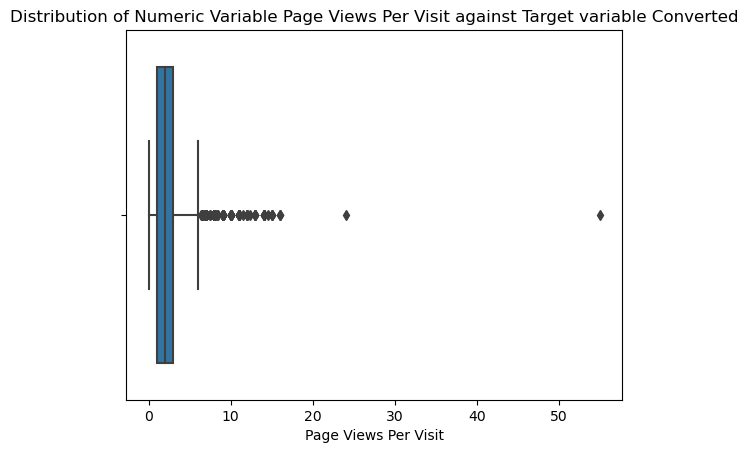

In [1059]:
#Plot numerical variables
# Draw box plots for numeric variables with continuous values to identify if there are major outliers
for i in numericCols:
    print('Mean',lead_df[i].mean())
    print('Median',lead_df[i].median())
    print('Mode',lead_df[i].mode()[0])
    print("25% quantile: ", np.quantile(lead_df[i], .25))   
    print("50% quantile: ", np.quantile(lead_df[i], .50))
    print("75% quantile: ", np.quantile(lead_df[i], .75))
    print("90% quantile: ", np.quantile(lead_df[i], .90))
    print("95% quantile: ", np.quantile(lead_df[i], .95))    
    print("99% quantile: ", np.quantile(lead_df[i], .99))  
    print("100th quantile: ", np.quantile(lead_df[i], .1))
    print(" ")
    sns.boxplot(lead_df[i])
    plt.title("Distribution of Numeric Variable " + str(i) + " against Target variable Converted")
    plt.show()
    

In [1060]:
#Drop records with outlier values
high_quantile = np.quantile(lead_df['TotalVisits'], .99)
lead_df = lead_df[lead_df['TotalVisits'] < high_quantile]

In [1061]:
#Drop records with outlier values
high_quantile = np.quantile(lead_df['Page Views Per Visit'], .99)
lead_df = lead_df[lead_df['Page Views Per Visit'] < high_quantile]

In [1062]:
lead_df[lead_df['Converted']==0].head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
5,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,Unemployed,No,Modified
7,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,Unemployed,No,Modified


Target 1
Mean 3.2648835202761
Median 3.0
Mode 0.0
25% quantile:  0.0
50% quantile:  3.0
75% quantile:  5.0
90% quantile:  7.0
95% quantile:  9.0
99% quantile:  13.0
100th quantile:  0.0
 
Target 0
Mean 2.9758645533141213
Median 3.0
Mode 0.0
25% quantile:  1.0
50% quantile:  3.0
75% quantile:  4.0
90% quantile:  6.0
95% quantile:  8.0
99% quantile:  12.0
100th quantile:  0.0
 


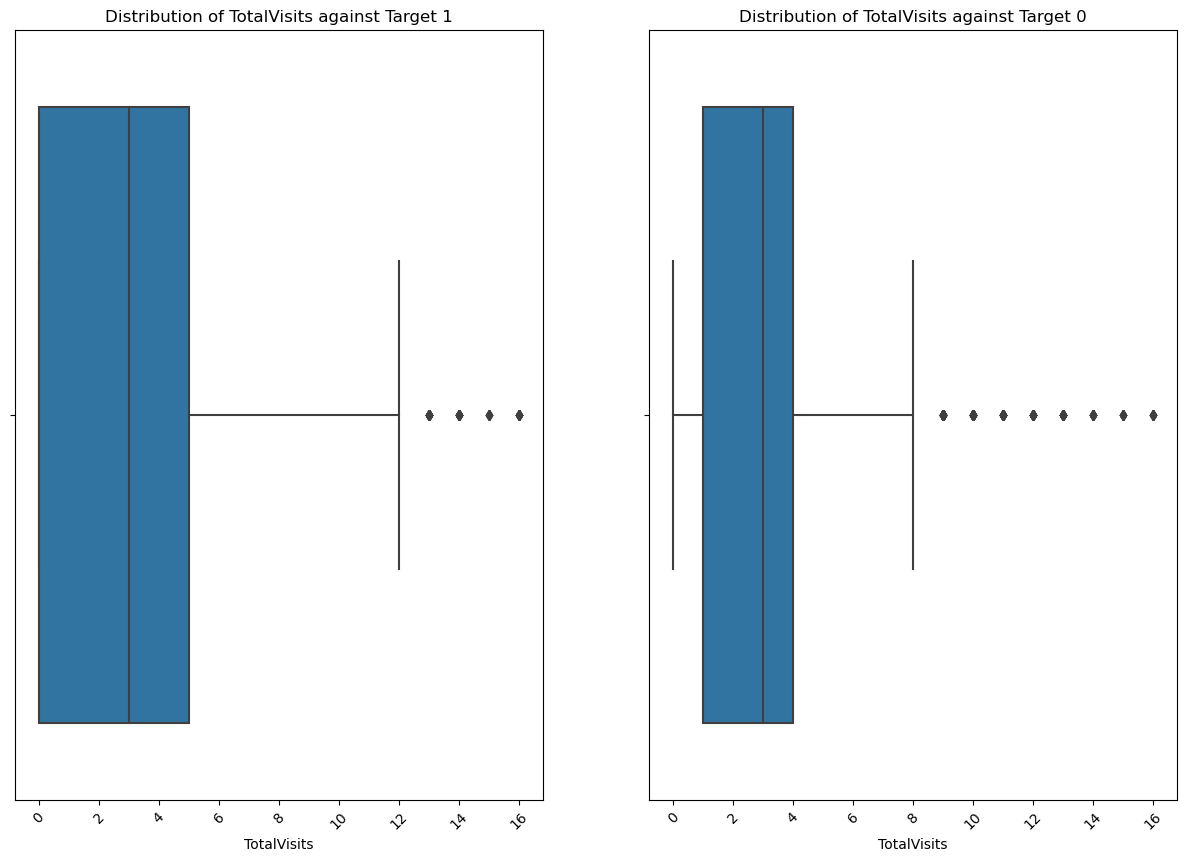

Target 1
Mean 731.889847569744
Median 823.0
Mode 0
25% quantile:  0.0
50% quantile:  823.0
75% quantile:  1264.0
90% quantile:  1535.4
95% quantile:  1673.1999999999998
99% quantile:  1886.0
100th quantile:  0.0
 
Target 0
Mean 327.34636167146977
Median 176.0
Mode 0
25% quantile:  13.0
50% quantile:  176.0
75% quantile:  390.25
90% quantile:  1080.7000000000016
95% quantile:  1376.4499999999998
99% quantile:  1726.9399999999987
100th quantile:  0.0
 


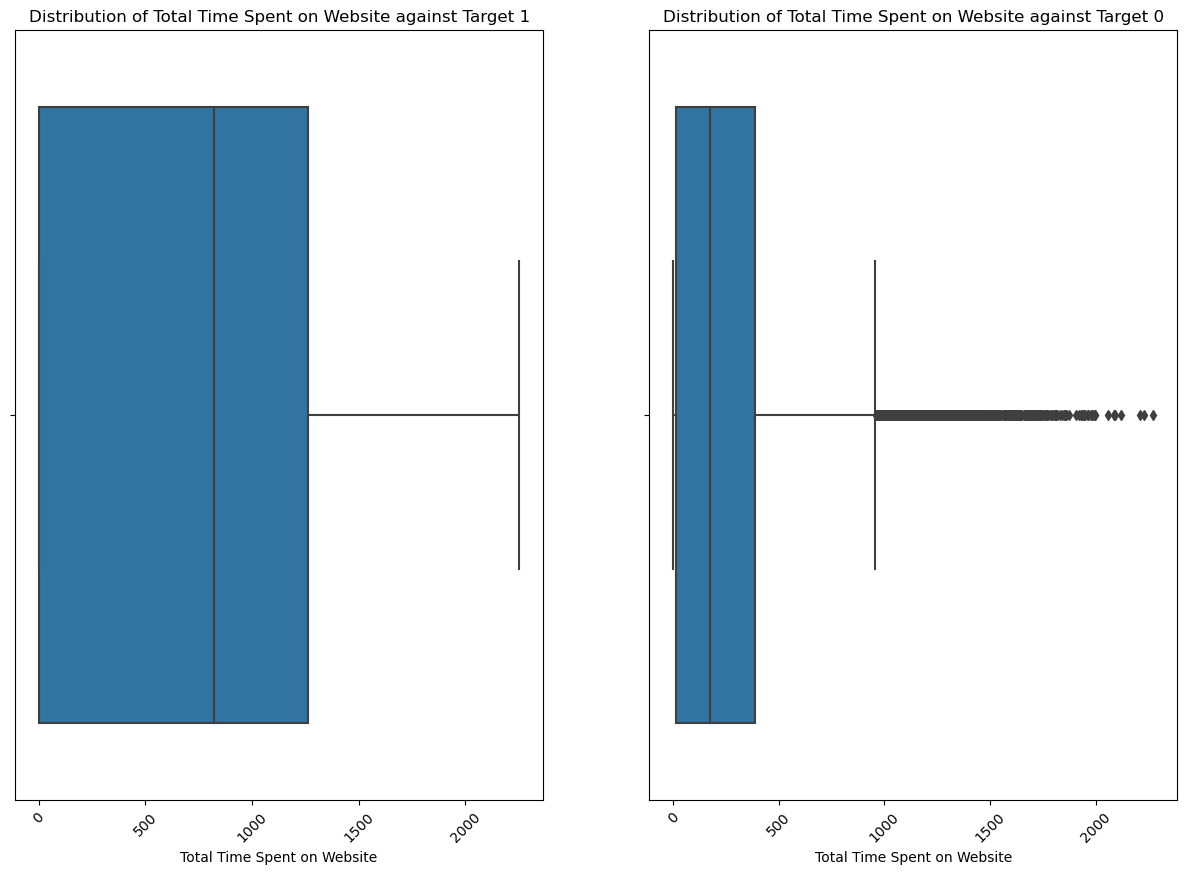

Target 1
Mean 2.2133966062697725
Median 2.0
Mode 0.0
25% quantile:  0.0
50% quantile:  2.0
75% quantile:  3.0
90% quantile:  5.0
95% quantile:  5.5
99% quantile:  7.0
100th quantile:  0.0
 
Target 0
Mean 2.234515489913544
Median 2.0
Mode 0.0
25% quantile:  1.0
50% quantile:  2.0
75% quantile:  3.0
90% quantile:  5.0
95% quantile:  6.0
99% quantile:  7.0
100th quantile:  0.0
 


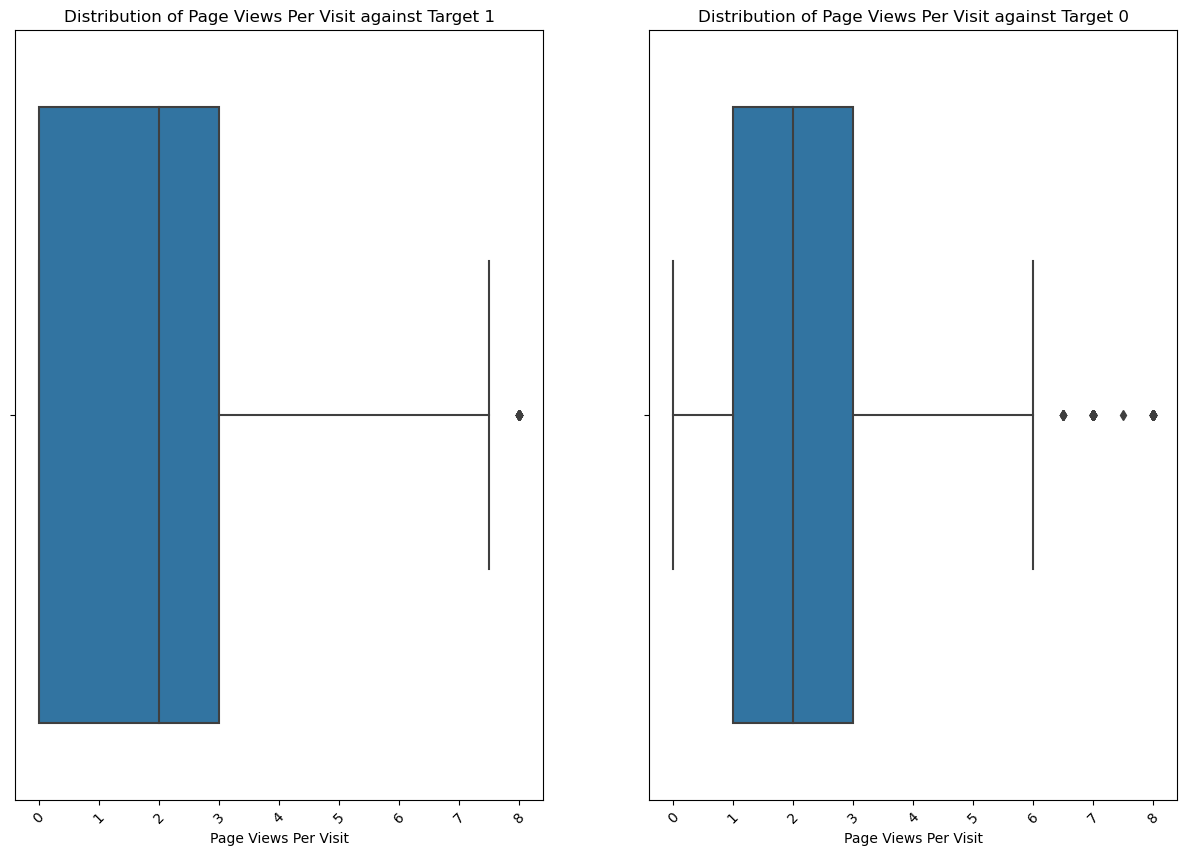

In [1063]:
#Plot numerical variables
# Draw box plots for numeric variables with continuous values to identify if there are major outliers
for i in numericCols:
    print("Target 1")
    print('Mean',lead_df[lead_df['Converted']==1][i].mean())
    print('Median',lead_df[lead_df['Converted']==1][i].median())
    print('Mode',lead_df[lead_df['Converted']==1][i].mode()[0])
    print("25% quantile: ", np.quantile(lead_df[lead_df['Converted']==1][i], .25))   
    print("50% quantile: ", np.quantile(lead_df[lead_df['Converted']==1][i], .50))
    print("75% quantile: ", np.quantile(lead_df[lead_df['Converted']==1][i], .75))
    print("90% quantile: ", np.quantile(lead_df[lead_df['Converted']==1][i], .90))
    print("95% quantile: ", np.quantile(lead_df[lead_df['Converted']==1][i], .95))    
    print("99% quantile: ", np.quantile(lead_df[lead_df['Converted']==1][i], .99))  
    print("100th quantile: ", np.quantile(lead_df[lead_df['Converted']==1][i], .1))
    print(" ")
    
    print("Target 0")
    print('Mean',lead_df[lead_df['Converted']==0][i].mean())
    print('Median',lead_df[lead_df['Converted']==0][i].median())
    print('Mode',lead_df[lead_df['Converted']==0][i].mode()[0])
    print("25% quantile: ", np.quantile(lead_df[lead_df['Converted']==0][i], .25))   
    print("50% quantile: ", np.quantile(lead_df[lead_df['Converted']==0][i], .50))
    print("75% quantile: ", np.quantile(lead_df[lead_df['Converted']==0][i], .75))
    print("90% quantile: ", np.quantile(lead_df[lead_df['Converted']==0][i], .90))
    print("95% quantile: ", np.quantile(lead_df[lead_df['Converted']==0][i], .95))    
    print("99% quantile: ", np.quantile(lead_df[lead_df['Converted']==0][i], .99))  
    print("100th quantile: ", np.quantile(lead_df[lead_df['Converted']==0][i], .1))
    print(" ")
    
    #sns.boxplot(lead_df[i])
    #plt.title("Distribution of Numeric Variable " + str(i) + " against Target variable Converted")
    #plt.show()
    
    plt.figure(figsize = (15,10))
    plt.subplot(1,2,1)
    sns.boxplot(lead_df[lead_df['Converted']==1][i])
    plt.xticks(rotation = 45)
    plt.title("Distribution of " + str(i) + " against Target 1")
    
    plt.subplot(1,2,2)
    sns.boxplot(lead_df[lead_df['Converted']==0][i])
    plt.xticks(rotation = 45)
    plt.title("Distribution of " + str(i) + " against Target 0")
    
    plt.show()

In [1064]:
lead_df[numericCols].describe()
# The values look okay. No major outliers observed.

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000
mean,3.087164,483.133016,2.226383
std,2.801244,547.420675,1.823395
min,0.000000,0.000000,0.000000
25%,1.000000,7.000000,1.000000
50%,3.000000,245.000000,2.000000
75%,4.000000,929.000000,3.000000
max,16.000000,2272.000000,8.000000


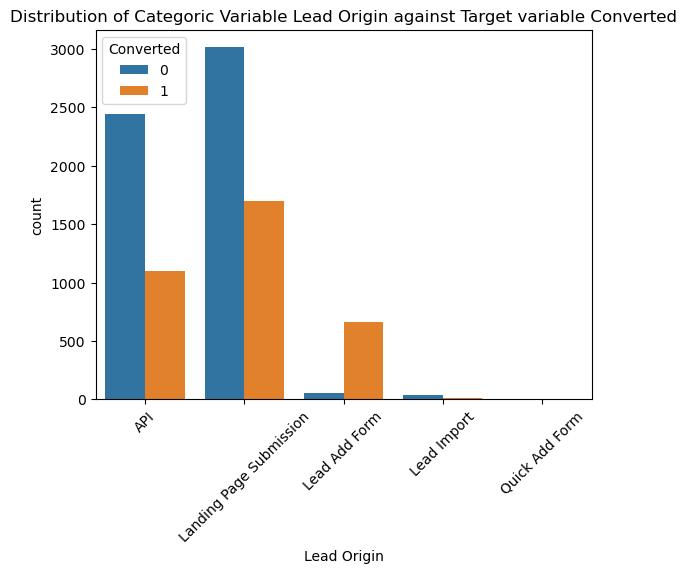

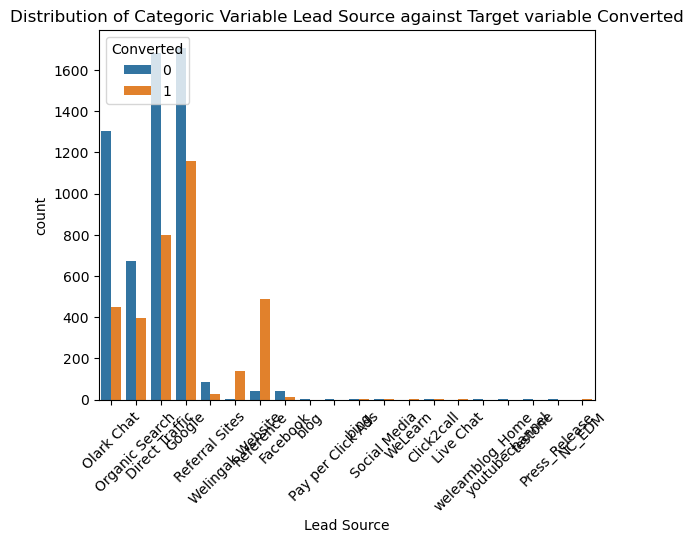

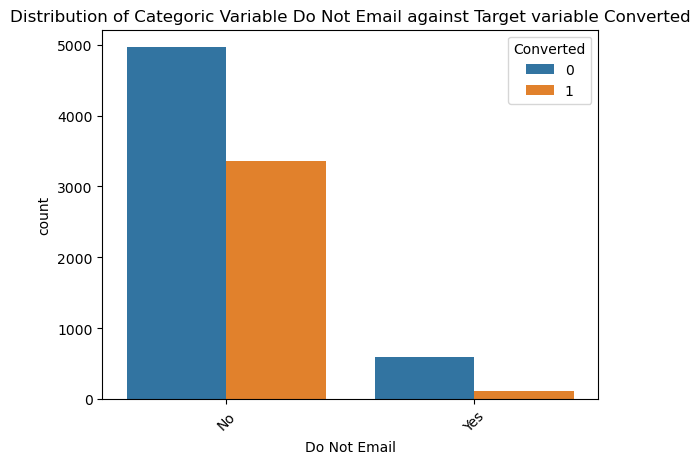

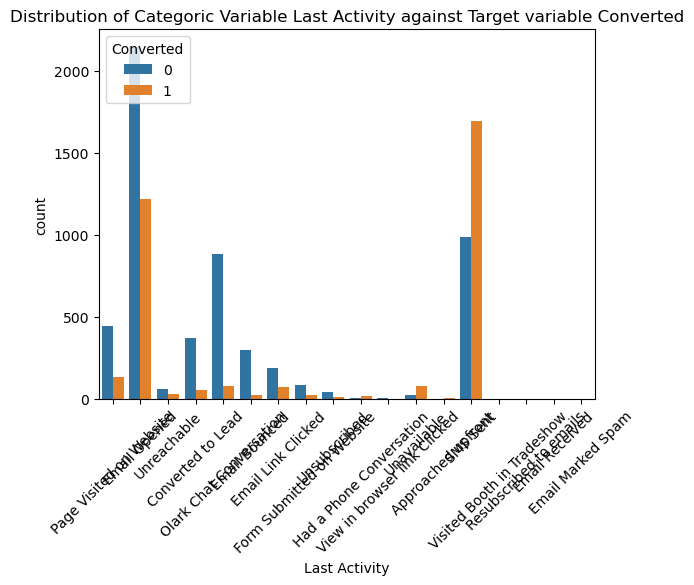

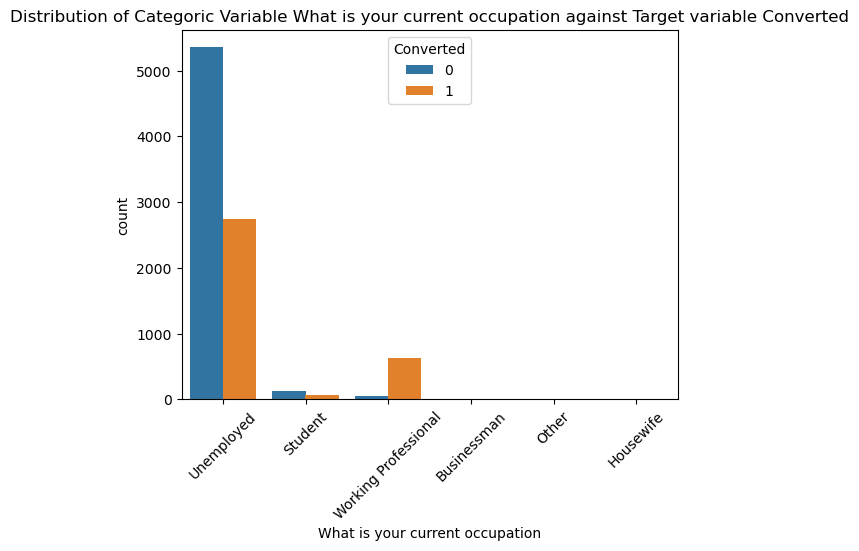

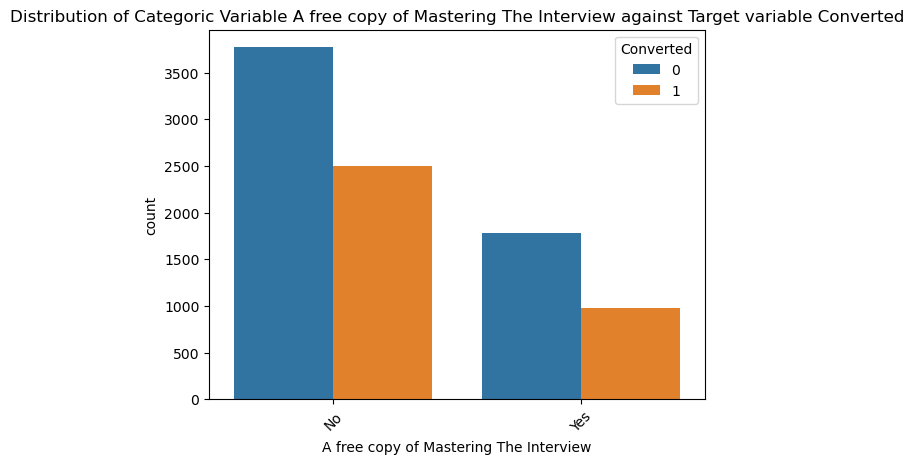

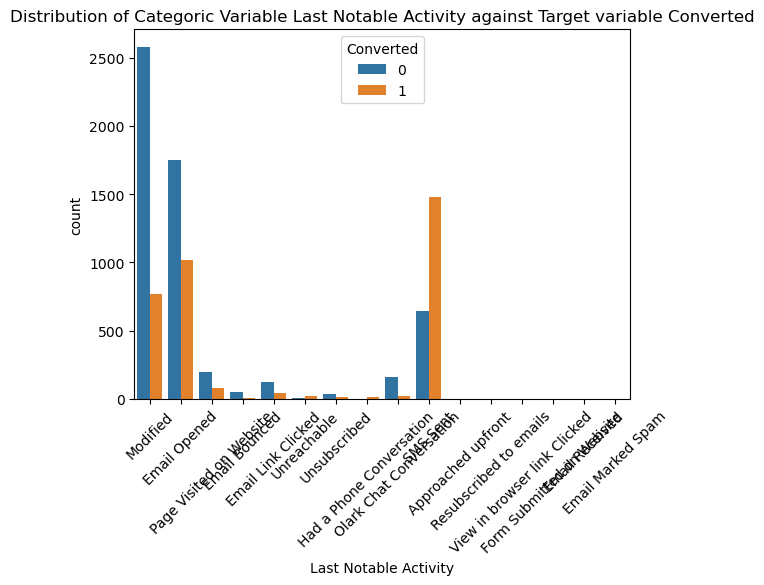

In [1065]:
#Univariate analysis of Categorical variables vs Target variables
for i in categoricCols:
    sns.countplot(data = lead_df, x= i, hue ='Converted')
    plt.xticks(rotation=45)
    plt.title("Distribution of Categoric Variable " + str(i) + " against Target variable Converted")
    plt.show()

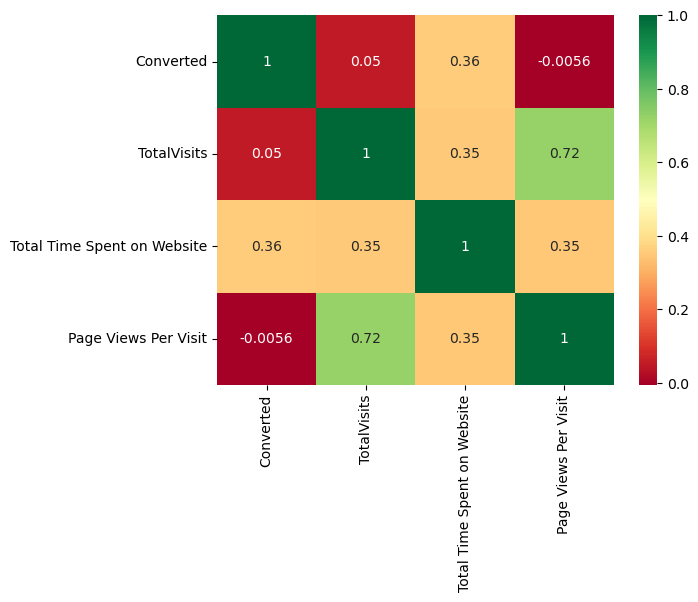

In [1066]:
sns.heatmap(lead_df.corr(), annot = True, cmap="RdYlGn")
plt.show()

In [1067]:
lead_df.shape

(9029, 11)

In [1068]:
round(9029/9240,2)*100
# Percentage of records retained after rows are dropped

98.0

## Step 5: Create Dummy Variables

In [1069]:
## Create dummy variables for all categorical variables
lead_df.columns


Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1070]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [1071]:
lead_df = pd.get_dummies(lead_df, drop_first=True)


In [1072]:
lead_df.shape

(9029, 66)

In [1073]:
lead_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1074]:
lead_df.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opene

## Step 6: Splitting the Data into Training and Testing Sets

In [1075]:
# Putting feature variable to X
X = lead_df.drop(['Converted'], axis = 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [1076]:
# Putting response variable to y
y= lead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1077]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 7: Feature Scaling


In [1078]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[ ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5493,-0.394290,-0.708153,-0.135234,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8064,-0.039721,-0.711823,0.410454,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4716,-0.039721,-0.471434,0.410454,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9117,-1.103429,-0.884316,-1.226608,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2402,1.023987,0.704822,-0.135234,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [1079]:
### Checking the convertion Rate
conv = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
conv
#Converted rate is 38.5 % 

38.50924797873519

## Step 8: Building a logistic regression model

In [1080]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6262
Model Family:                Binomial   Df Model:                           57
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 08 Aug 2023   Deviance:                   1.2462e+05
Time:                        16:20:27   Pearson chi2:                 6.09e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 -8.89e+14   5.22e+07   -1.7e+07      0.000   -8.89e+14   -8.89e+14
TotalVisits                                           1.987e+14   1.33e+06    1.5e+08      0.000    1.99e+14    1.99e+14
Total Time Spent on Website                           1.005e+15   9.77e+05   1.03e+09      0.000    1.01e+15    1.01e+15
Page Views Per Visit                                 -1.076e+14   1.45e+06   -7.4e+07      0.000   -1.08e+14   -1.08e+14
Lead Origin_Landing Page Submission                  -9.512e+13   2.73e+06  -3.49e+07      0.000   -9.51e+13   -9.51e+13
Lead Origin_Lead Add Form                             2.931e+15   1.33e+07   2.21e+08      0.000    2.93e+15    2.93e+15
Lead Origin_Lead Import                               1.244e+15    4.8e+07   2.59e+07      0.000    1.24e+15    1.24e+15
Lead Origin_Quick Add Form                             -48.1225   9.45e-07  -5.09e+07      0.000     -48.123     -48.122
Lead Source_Direct Traffic                            2.353e+15   4.11e+07   5.73e+07      0.000    2.35e+15    2.35e+15
Lead Source_Facebook                                  1.591e+15    6.3e+07   2.52e+07      0.000    1.59e+15    1.59e+15
Lead Source_Google                                    2.421e+15   4.09e+07   5.91e+07      0.000    2.42e+15    2.42e+15
Lead Source_Live Chat                                 6.147e+15   6.13e+07      1e+08      0.000    6.15e+15    6.15e+15
Lead Source_NC_EDM                                    6.286e+15   7.86e+07      8e+07      0.000    6.29e+15    6.29e+15
Lead Source_Olark Chat                                3.289e+15   4.11e+07   7.99e+07      0.000    3.29e+15    3.29e+15
Lead Source_Organic Search                            2.245e+15    4.1e+07   5.47e+07      0.000    2.25e+15    2.25e+15
Lead Source_Pay per Click Ads                           12.7619   2.73e-07   4.67e+07      0.000      12.762      12.762
Lead Source_Press_Release                            -9.121e+14   7.89e+07  -1.16e+07      0.000   -9.12e+14   -9.12e+14
Lead Source_Reference                                 1.598e+15    3.9e+07    4.1e+07      0.000     1.6e+15     1.6e+15
Lead Source_Referral Sites                             1.93e+15   4.17e+07   4.63e+07      0.000    1.93e+15    1.93e+15
Lead Source_Social Media                              2.746e+15   6.28e+07   4.37e+07      0.000    2.75e+15    2.75e+15
Lead Source_WeLearn                                   5.684e+15   7.87e+07   7.23e+07      0.000    5.68e+15    5.68e+15
Lead Source_Welingak Website                          2.325e+15   3.94e+07    5.9e+07      0.000    2.33e+15    2.33e+15
Lead Source_bing                                      2.43

## Step 9: Feature Selection using RFE


In [1081]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1082]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select= 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [1083]:
rfe.support_

array([False,  True, False, False,  True, False, False,  True, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False,  True, False, False,  True, False,  True,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False])

In [1084]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 27),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 33),
 ('Lead Origin_Landing Page Submission', False, 26),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 28),
 ('Lead Origin_Quick Add Form', False, 44),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 31),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 35),
 ('Lead Source_NC_EDM', False, 16),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 45),
 ('Lead Source_Press_Release', False, 40),
 ('Lead Source_Reference', False, 21),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 9),
 ('Lead Source_WeLearn', False, 23),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 42),
 ('Lead Source_blog', False, 13),
 ('Lead Source_testone', False, 43),
 ('Lead Source_welearnblog_Home', False, 30

In [1085]:
col = X_train.columns[rfe.support_]

In [1086]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'L

#### Assessing the model with StatsModels

#### Function to build a model using Generalized Linear Model Regression 

In [1087]:
def build_logistic_regression_model(df_temp):
    # Adding a constant variable 
    X_train_sm = sm.add_constant(df_temp)
    # Running the linear model
    logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    # Print Summary
    res = logm1.fit()
    print(res.summary())

#### Function to calculate VIFs 

In [1088]:
#Function to calculate VIFs 
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(df_temp):
    vif = pd.DataFrame()
    vif['Features'] = df_temp.columns
    vif['VIF'] = [variance_inflation_factor(df_temp.values, i) for i in range(df_temp.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

#### Building Model 1

In [1089]:
X_train_rfe1 = X_train[col]
build_logistic_regression_model(X_train_rfe1)
calculate_vif(X_train_rfe1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.0
Date:                Tue, 08 Aug 2023   Deviance:                       5228.0
Time:                        16:20:32   Pearson chi2:                 6.80e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3949
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [1090]:
# P value of the column 'What is your current occupation_Housewife' is high. Hence drop it.
col= col.drop('What is your current occupation_Housewife')

#### Building Model 2

In [1091]:
X_train_rfe1 = X_train[col]
build_logistic_regression_model(X_train_rfe1)
calculate_vif(X_train_rfe1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2619.5
Date:                Tue, 08 Aug 2023   Deviance:                       5239.0
Time:                        16:20:33   Pearson chi2:                 6.81e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3938
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [1092]:
# P value of the column 'Last Notable Activity_Had a Phone Conversation' is high. Hence drop it.
col= col.drop('Last Notable Activity_Had a Phone Conversation')

#### Building Model 3

In [1093]:
X_train_rfe1 = X_train[col]
build_logistic_regression_model(X_train_rfe1)
calculate_vif(X_train_rfe1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2621.8
Date:                Tue, 08 Aug 2023   Deviance:                       5243.6
Time:                        16:20:33   Pearson chi2:                 6.81e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3934
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [1094]:
# P value of the column 'Lead Source_Welingak Website' is high. Hence drop it.
col= col.drop('Lead Source_Welingak Website')

#### Building Model 4

In [1095]:
X_train_rfe1 = X_train[col]
build_logistic_regression_model(X_train_rfe1)
calculate_vif(X_train_rfe1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.9
Date:                Tue, 08 Aug 2023   Deviance:                       5255.9
Time:                        16:20:33   Pearson chi2:                 7.07e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3922
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [1096]:
# P value of the column 'Last Activity_Email Bounced' is high. Hence drop it.
col= col.drop('Last Activity_Email Bounced')

#### Building Model 5

In [1097]:
X_train_rfe1 = X_train[col]
build_logistic_regression_model(X_train_rfe1)
calculate_vif(X_train_rfe1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2632.8
Date:                Tue, 08 Aug 2023   Deviance:                       5265.7
Time:                        16:20:33   Pearson chi2:                 7.05e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3913
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [1098]:
# P value of the column 'Lead Source_Referral Sites ' is high. Hence drop it.
col= col.drop('Lead Source_Referral Sites')

#### Building Model 6

In [1099]:
X_train_rfe1 = X_train[col]
build_logistic_regression_model(X_train_rfe1)
calculate_vif(X_train_rfe1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2639.5
Date:                Tue, 08 Aug 2023   Deviance:                       5279.0
Time:                        16:20:34   Pearson chi2:                 7.02e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3900
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [1100]:
#Model 6 looks to be the final model since P value is 0.00 for all variables and the VIF values are also good.

In [1101]:
#Run final Model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()

### Getting the predicted values on the train set

In [1102]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5493    0.070532
8064    0.070270
4716    0.022299
9117    0.245820
2402    0.425879
1796    0.058750
1120    0.058750
253     0.148885
1491    0.174519
2004    0.334061
dtype: float64

In [1103]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07053224, 0.07027034, 0.02229893, 0.24582027, 0.42587857,
       0.05875017, 0.05875017, 0.14888486, 0.17451919, 0.3340611 ])

In [1104]:
y_train_pred.shape

(6320,)

In [1105]:
y_train.shape

(6320,)

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [1106]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadScore_id'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadScore_id
0,0,0.070532,5493
1,0,0.070270,8064
2,0,0.022299,4716
3,0,0.245820,9117
4,1,0.425879,2402


#### Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0


In [1107]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadScore_id,predicted
0,0,0.070532,5493,0
1,0,0.070270,8064,0
2,0,0.022299,4716,0
3,0,0.245820,9117,0
4,1,0.425879,2402,0


In [1108]:
from sklearn import metrics

In [1109]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3456  453]
 [ 732 1679]]


In [1110]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8125


#### Checking VIF

In [1111]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Modified,2.65
7,Last Activity_Olark Chat Conversation,1.85
3,Lead Source_Google,1.78
2,Lead Source_Direct Traffic,1.76
11,Last Notable Activity_Email Opened,1.72
13,Last Notable Activity_Olark Chat Conversation,1.36
1,Lead Origin_Lead Add Form,1.30
4,Lead Source_Organic Search,1.30
6,Last Activity_Converted to Lead,1.26
0,Total Time Spent on Website,1.25


## Metrics beyond simply accuracy


In [1112]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives Generate Metrics

In [1113]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.696391538780589

In [1114]:
# specificity
TN / float(TN+FP)

0.884113584036838

In [1115]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11588641596316193


In [1116]:
# positive predictive value 
print (TP / float(TP+FP))

0.7875234521575984


In [1117]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8252148997134671


## Step 10: Plotting the ROC Curve

#### An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1118]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1119]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )


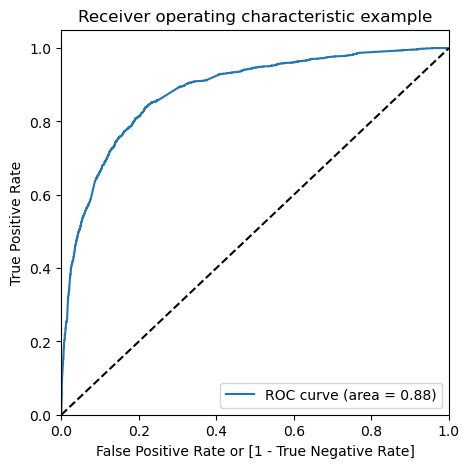

In [1120]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Step 11: Determine Optimal Cutoff Point

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [1121]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadScore_id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.070532,5493,0,1,0,0,0,0,0,0,0,0,0
1,0,0.070270,8064,0,1,0,0,0,0,0,0,0,0,0
2,0,0.022299,4716,0,1,0,0,0,0,0,0,0,0,0
3,0,0.245820,9117,0,1,1,1,0,0,0,0,0,0,0
4,1,0.425879,2402,0,1,1,1,1,1,0,0,0,0,0


In [1122]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381487  1.000000  0.000000
0.1   0.1  0.598418  0.965160  0.372218
0.2   0.2  0.754430  0.907922  0.659760
0.3   0.3  0.802690  0.842389  0.778204
0.4   0.4  0.811867  0.776027  0.833973
0.5   0.5  0.812500  0.696392  0.884114
0.6   0.6  0.794304  0.576939  0.928370
0.7   0.7  0.781804  0.503940  0.953185
0.8   0.8  0.760918  0.422231  0.969813
0.9   0.9  0.706171  0.249274  0.987976


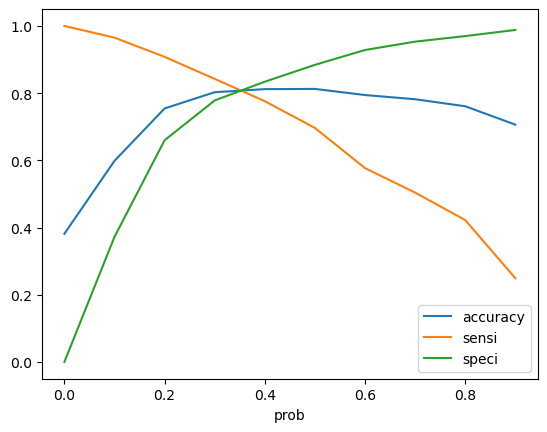

In [1123]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.375 is the optimum point to take it as a cutoff probability.

In [1124]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.375 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadScore_id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.070532,5493,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.070270,8064,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.022299,4716,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.245820,9117,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.425879,2402,0,1,1,1,1,1,0,0,0,0,0,1


In [1125]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.807753164556962

In [1126]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3193,  716],
       [ 499, 1912]])

In [1127]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1128]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.79303193695562

In [1129]:
# Let us calculate specificity
TN / float(TN+FP)

0.8168329496034792

In [1130]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18316705039652084


In [1131]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7275494672754946


In [1132]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8648429035752979


### Precision and Recall

In [1133]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3456,  453],
       [ 732, 1679]])

In [1134]:
from sklearn.metrics import precision_score, recall_score

In [1135]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7875234521575984

In [1136]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.696391538780589

### Precision and recall tradeoff


In [1137]:
from sklearn.metrics import precision_recall_curve

In [1138]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

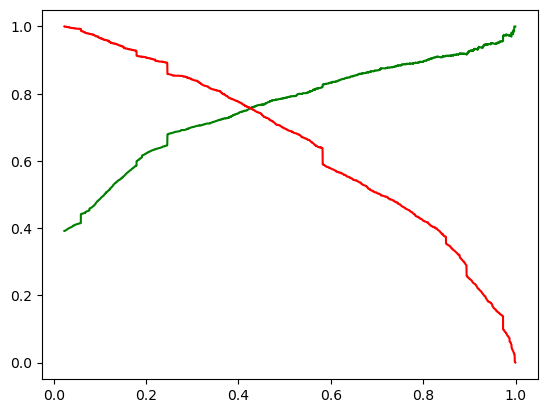

In [1139]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 11: Making Predictions on the test set using the Final Model

In [1140]:
X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']])

In [1141]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_Unavailable,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
4664,-0.884316,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5394,-0.583371,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1595,1.264507,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2111,0.073571,0,1,0,0,0,0,0,0,0,0,1,0,0,0
9182,-0.884316,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [1142]:
X_test_sm = sm.add_constant(X_test)

In [1143]:
y_test_pred = res.predict(X_test_sm)

In [1144]:
y_test_pred[:10]

4664    0.245820
5394    0.232767
1595    0.910115
2111    0.209779
9182    0.179328
1055    0.459511
541     0.172849
446     0.987048
3728    0.031878
4249    0.018269
dtype: float64

In [1145]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1146]:
# Let's see the head
y_pred_1.head()

,0
4664,0.245820
5394,0.232767
1595,0.910115
2111,0.209779
9182,0.179328


In [1147]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1148]:
# Putting CustID to index
y_test_df['LeadScore_id'] = y_test_df.index

In [1149]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1150]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1151]:
y_pred_final.head()

,Converted,LeadScore_id,0
0,0,4664,0.245820
1,0,5394,0.232767
2,1,1595,0.910115
3,0,2111,0.209779
4,0,9182,0.179328


In [1152]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [1153]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadScore_id','Converted','Converted_Prob'], axis=1)

In [1154]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadScore_id,Converted,Converted_Prob
0,4664,0,0.245820
1,5394,0,0.232767
2,1595,1,0.910115
3,2111,0,0.209779
4,9182,0,0.179328


In [1155]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.375 else 0)

In [1156]:
y_pred_final.head()

,LeadScore_id,Converted,Converted_Prob,final_predicted
0,4664,0,0.245820,0
1,5394,0,0.232767,0
2,1595,1,0.910115,1
3,2111,0,0.209779,0
4,9182,0,0.179328,0


## Step 12: Model Evaluation

In [1157]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.805094130675526

In [1158]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1338,  305],
       [ 223,  843]])

In [1159]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1160]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7908067542213884

In [1161]:
# Let us calculate specificity
TN / float(TN+FP)

0.8143639683505782

### Precision and Recall of test set

In [1162]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7343205574912892

In [1163]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7908067542213884

### Precision and recall tradeoff


In [1164]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

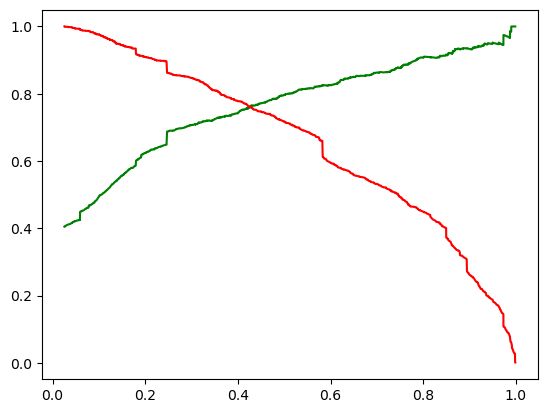

In [1165]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Final Inferences

### 1) Compare the metrics of Train and Test data
Train Data:

    Accuracy: 0.80
    
    Sensitivity:0.79
    
    Specificity:0.81
    
    Precision: 0.78
    
    Recall: 0.69
    
    
Test Data:

    Accuracy: 0.80
    
    Sensitivity:0.79
    
    Specificity: 0.81
    
    Precision: 0.73
    
    Recall: 0.79
    
        



### 2) Find the leads who could be contacted

In [1166]:
leads = y_pred_final.loc[y_pred_final['Converted_Prob']>= 0.80]
leads.shape
# 433 customers could be contacted. They are potential to be converted as customers.

(528, 4)

In [1167]:
leads

,LeadScore_id,Converted,Converted_Prob,final_predicted
2,1595,1,0.910115,1
7,446,1,0.987048,1
11,5036,1,0.949588,1
19,2673,1,0.997946,1
20,8105,0,0.867890,1
...,...,...,...,...
2689,1536,1,0.849340,1
2690,337,0,0.863932,1
2697,7065,0,0.862395,1
2701,4612,1,0.987048,1


### 3) Identify the significant independent variables

In [1168]:
res.params.sort_values(ascending = False)

Lead Origin_Lead Add Form                               3.250342
What is your current occupation_Working Professional    2.604062
const                                                   1.296016
Total Time Spent on Website                             1.090418
Last Activity_Converted to Lead                        -0.857359
Lead Source_Google                                     -0.910481
Lead Source_Organic Search                             -1.111224
Lead Source_Direct Traffic                             -1.249724
Last Activity_Olark Chat Conversation                  -1.253005
Last Notable Activity_Email Opened                     -1.452772
Last Notable Activity_Olark Chat Conversation          -1.558720
Do Not Email_Yes                                       -1.598746
Last Activity_Unavailable                              -1.683469
Last Notable Activity_Email Link Clicked               -1.775201
Last Notable Activity_Page Visited on Website          -1.812129
Last Notable Activity_Mod

1) Reachout to customers with lead origin 'Lead Add Form'. These customers have the highest chances of getting converted.

2) Reach out to customers whose current occupation is 'Working Professional'. They have a good chance of getting converted.

3) Reach out to customers who spent more time on website.